## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS

## Import Dataset

In [2]:
data1 = pd.read_csv('Sentiment.csv')

In [3]:
data1.shape

(13871, 21)

In [6]:
data1.head().T

,0,1,2,3,4
id,1,2,3,4,5
candidate,No candidate mentioned,Scott Walker,No candidate mentioned,No candidate mentioned,Donald Trump
candidate_confidence,1.0,1.0,1.0,1.0,1.0
relevant_yn,yes,yes,yes,yes,yes
relevant_yn_confidence,1.0,1.0,1.0,1.0,1.0
sentiment,Neutral,Positive,Neutral,Positive,Positive
sentiment_confidence,0.6578,0.6333,0.6629,1.0,0.7045
subject_matter,None of the above,None of the above,None of the above,None of the above,None of the above
subject_matter_confidence,1.0,1.0,0.6629,0.7039,1.0
candidate_gold,NaN,NaN,NaN,NaN,NaN


## Keeping only the neccessary columns (data)

In [7]:
data = data1[['text','sentiment']]

In [8]:
data.shape

(13871, 2)

In [9]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


## Splitting the dataset into train and test set

In [10]:
train, test = train_test_split(data, test_size = 0.1)

In [11]:
train.shape

(12483, 2)

In [12]:
test.shape

(1388, 2)

In [14]:
train.head()

,text,sentiment
12948,I might be ambivalent about the current Democr...,Neutral
13107,RT @RWSurferGirl: FOX News won't admit who the...,Negative
10578,RT @RWSurferGirl: Fox News is obviously trying...,Negative
1542,RT @larryelder: How DARE FOX ask #DonaldTrump ...,Neutral
13747,@IngrahamAngle who is winning? Unfortunately ...,Negative


In [15]:
test.head()

,text,sentiment
11138,RT @ThatChrisGore: Ted Cruz's mutant superpowe...,Negative
10775,RT @Gauchat: Hopefully we'll find out where Go...,Negative
1701,Donald Trump just gave a master class on how t...,Negative
7254,RT @chuckwoolery \nThere are a lot of good peo...,Positive
13635,RT @RWSurferGirl: I think Cruz and Trump need ...,Positive


## Removing Neutral Sentiments (train data)

* I dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

In [16]:
train = train[train.sentiment != "Neutral"]
train.shape

(9647, 2)

## Separating Positive and Negative Sentiments (train data)

In [17]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [18]:
type(train_pos)

pandas.core.series.Series

In [19]:
type(train_neg)

pandas.core.series.Series

In [20]:
train_pos.head()

1061     RT @DeborahPeasley: Multiple shots of Scott Wa...
2593     All my faves did really well last night: @marc...
10161    #GOPDebates #ChrisChristie is no more conserva...
543      RT @bodybynance: Absolutely! I have authored K...
13599    RT @RWSurferGirl: I think Cruz and Trump need ...
Name: text, dtype: object

In [21]:
train_neg.head()

13107    RT @RWSurferGirl: FOX News won't admit who the...
10578    RT @RWSurferGirl: Fox News is obviously trying...
13747    @IngrahamAngle  who is winning? Unfortunately ...
11072    RT @marymauldin: Hey @FoxNews ! How absolutely...
2671             So are we all drunk now? #GOPDebate #2016
Name: text, dtype: object

## Making function for data cleaning and wordcloud

In [22]:
def wordcloud_draw(data, color='black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

## Wordclouds of Positive and Negative Words

Positive words


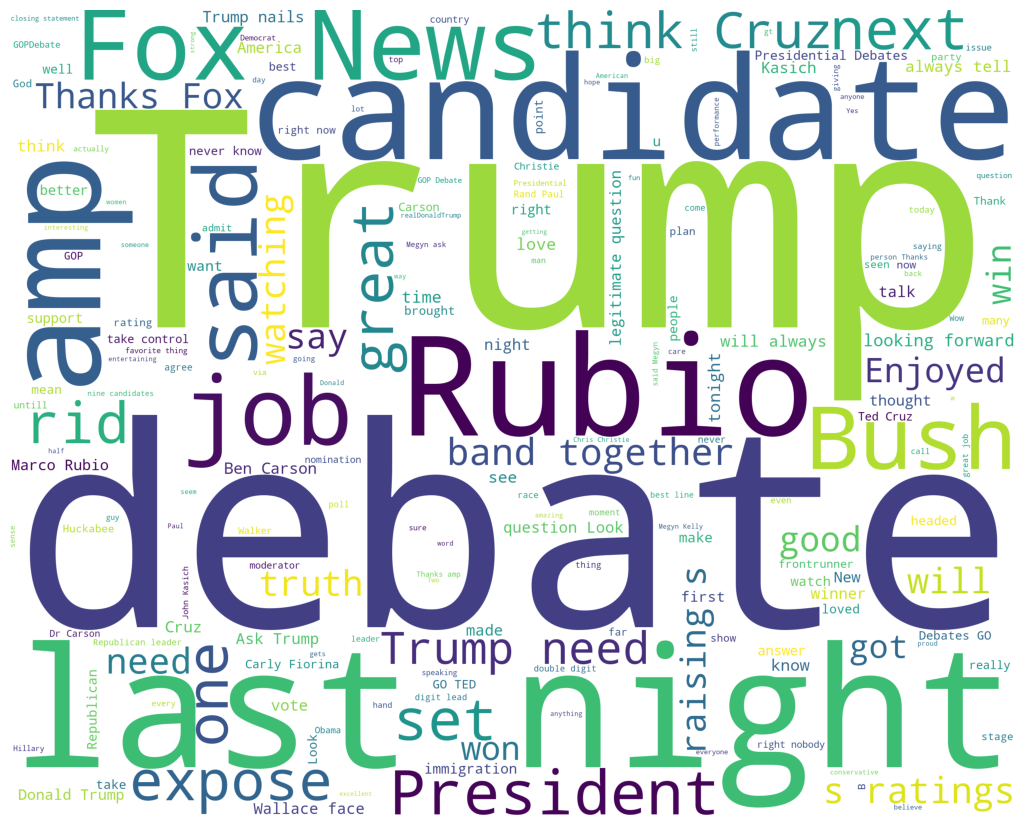

In [171]:
print("Positive words")
wordcloud_draw(train_pos,'white')

Negative words


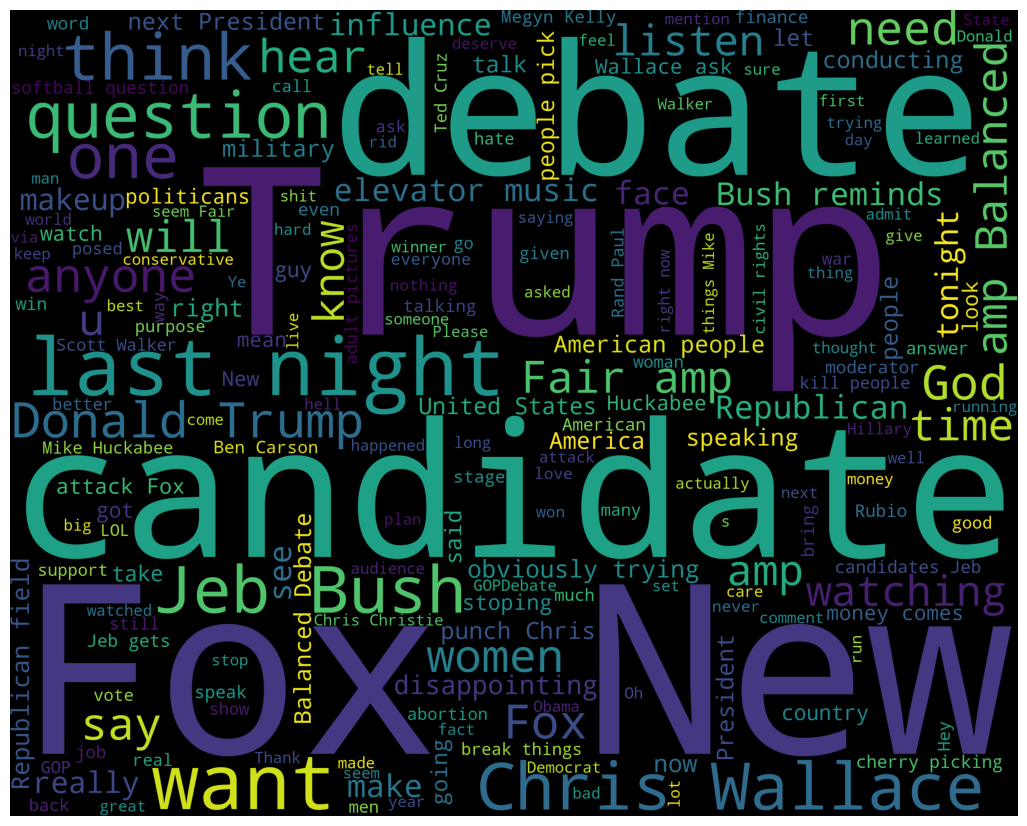

In [172]:
print("Negative words")
wordcloud_draw(train_neg)

## Cleaning data and remove stopwords from train data (tweets)

In [24]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

In [26]:
len(tweets)

9647

In [32]:
tweets[0]

(['fox',
  'news',
  'admit',
  'republican',
  'leader',
  'right',
  'mean',
  'double-digit',
  'lead'],
 'Negative')

In [35]:
tweets[-1]

(['shocking', 'photo', 'taken', 'sewers', 'ohio', 'last', 'night.'],
 'Negative')

## Getting list of words from refined train data (tweets)

In [37]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

wordlist = get_words_in_tweets(tweets)
len(wordlist)

76198

In [39]:
print(wordlist[0:10])

['fox', 'news', 'admit', 'republican', 'leader', 'right', 'mean', 'double-digit', 'lead', 'fox']


In [40]:
print(wordlist[-10:])

['gov.', 'walker’s', 'remarks.', 'shocking', 'photo', 'taken', 'sewers', 'ohio', 'last', 'night.']


## Getting frequency distributions of list of words (tweets) then unique_words_list (w_features)

In [41]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(wordlist)
type(w_features)

dict_keys

In [42]:
len(w_features)

14576

In [58]:
print( list(w_features)[0:10] )

['fox', 'news', 'admit', 'republican', 'leader', 'right', 'mean', 'double-digit', 'lead', 'obviously']


In [59]:
print( list(w_features)[-10:] )

['honest,', 'canwe', 'abuses', 'ordering', '"ultimately,', 'unhappy,', 'right"', 'lb.', 'birth…', 'remarks.']


In [60]:
dummy1 = nltk.FreqDist(wordlist)
type(dummy1)

nltk.probability.FreqDist

In [65]:
dummy1

FreqDist({'fox': 1039, 'trump': 962, '&amp;': 781, 'news': 587, 'last': 555, 'like': 533, 'jeb': 420, 'people': 415, 'bush': 390, 'candidates': 368, ...})

In [67]:
print( list(dummy1.keys())[0:10] )

['fox', 'news', 'admit', 'republican', 'leader', 'right', 'mean', 'double-digit', 'lead', 'obviously']


In [68]:
print( list(dummy1.values())[0:10] )

[1039, 587, 63, 285, 63, 129, 95, 50, 63, 139]


In [69]:
print( list(dummy1.items())[0:10] )

[('fox', 1039), ('news', 587), ('admit', 63), ('republican', 285), ('leader', 63), ('right', 129), ('mean', 95), ('double-digit', 50), ('lead', 63), ('obviously', 139)]


## Define function to confirm that words in unique_words_list (w_features) are present in a document

In [70]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [77]:
features_test = extract_features(test)
type(features_test)

dict

In [84]:
len(w_features)

14576

In [85]:
len(test)

1388

In [80]:
len(features_test)

14576

In [83]:
print( list(features_test.items())[0:10] )

[('contains(fox)', False), ('contains(news)', False), ('contains(admit)', False), ('contains(republican)', False), ('contains(leader)', False), ('contains(right)', False), ('contains(mean)', False), ('contains(double-digit)', False), ('contains(lead)', False), ('contains(obviously)', False)]


In [103]:
list(features_test.values()).count(False)

14576

In [104]:
list(features_test.values()).count(True)

0

## Training the Naive Bayes Classifier

In [105]:
training_set = nltk.classify.apply_features(extract_features, tweets)
type(training_set)

nltk.collections.LazyMap

In [107]:
len(training_set)

9647

In [147]:
len(tweets)

9647

In [148]:
tweets[0]

(['fox',
  'news',
  'admit',
  'republican',
  'leader',
  'right',
  'mean',
  'double-digit',
  'lead'],
 'Negative')

In [131]:
print( len(training_set[0]) )
print( len(training_set[-1]) )

2
2


In [141]:
print( len(training_set[0][0]) )
print( len(training_set[0][1]) )
print( len(training_set[-1][0]) )
print( len(training_set[-1][1]) )

14576
8
14576
8


In [150]:
training_set[0][1]

'Negative'

In [146]:
list(training_set[0][0].items())[0:10]

[('contains(fox)', True),
 ('contains(news)', True),
 ('contains(admit)', True),
 ('contains(republican)', True),
 ('contains(leader)', True),
 ('contains(right)', True),
 ('contains(mean)', True),
 ('contains(double-digit)', True),
 ('contains(lead)', True),
 ('contains(obviously)', False)]

In [149]:
naive_bayes_classifier = nltk.NaiveBayesClassifier.train(training_set)
naive_bayes_classifier

## Separating Positive and Negative Sentiments (test data)

In [36]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

## Naive_Bayes_Classifier prediction of positive and negative sentiments (test data)

In [169]:
test_pos.shape

(206,)

In [170]:
test_neg.shape

(876,)

In [153]:
for obj in test_neg[50:60]:
    print(obj)

RT @SupermanHotMale: Dear Dr. Ben Carson, you, Sir need a labotomy #GopDebates
RT @_Darling_Nikki: 😂 RT @SupermanHotMale Little bitch fight alert ---&gt; : D #GopDebates http://t.co/13q9KKoaSX
Dr. King says his dream became a nightmare... https://t.co/ZmMwPr1IZh  #JusticeOrElse #GOPDebate
.@paolo_sf
FOX/GOP Party's Hunger Games- Demagog Food-fighter @CarlyFiorina
#GOPDebate #morningjoe http://t.co/ygMGbAvqut
RT @BRios82: Yes, @JebBush Obama's dividing the country by creating jobs, ending wars, achieving diplomacy w/ Iran &amp; giving people Healthca…
#GOPDebates if Jed bush wins presidency does that mean we get more of that hilarious show LIL BUSH? ✋👊
RT @RWSurferGirl: The candidates don't have to attack @realDonaldTrump Fox is doing it for them by stoping him from speaking. 🇺🇸 #GOPDebate…
RT @DanScavino: .@MegynKelly trying 2show up @realDonaldTrump w @FoxNews. Trying 2take him down. Trying 2destroy him. Not happening. #Kelly…
Trump should do like Obama and refuse to communicate with 

In [161]:
for obj in test_neg[50:51]:
    print(obj.split())

['RT', '@SupermanHotMale:', 'Dear', 'Dr.', 'Ben', 'Carson,', 'you,', 'Sir', 'need', 'a', 'labotomy', '#GopDebates']


In [165]:
# for obj in test_neg[50:51]:
#     print(extract_features(obj.split()))

# {'contains(fox)': False, 'contains(news)': False, 'contains(admit)': False, 'contains(birth…)': False, 'contains(remarks.)': False}
# print(len(extract_features(obj.split()))) = 14576

In [166]:
for obj in test_neg[50:51]:
    res_50 = naive_bayes_classifier.classify(extract_features(obj.split()))

print(res_50)

Negative


In [167]:
neg_cnt = 0
pos_cnt = 0

for obj in test_neg: 
    res =  naive_bayes_classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1

for obj in test_pos: 
    res =  naive_bayes_classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 876/839 
[Positive]: 206/92 


* This model worked well for negative sentiments prediction.
  * Actual negative sentiments = 876 and predicted negative sentiments = 839
* But, This model didn't worked well for positive sentiments prediction.
  * Actual positive sentiments = 206 and predicted positive sentiments = 92

* https://www.kaggle.com/code/ngyptr/python-nltk-sentiment-analysis/notebook